In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd


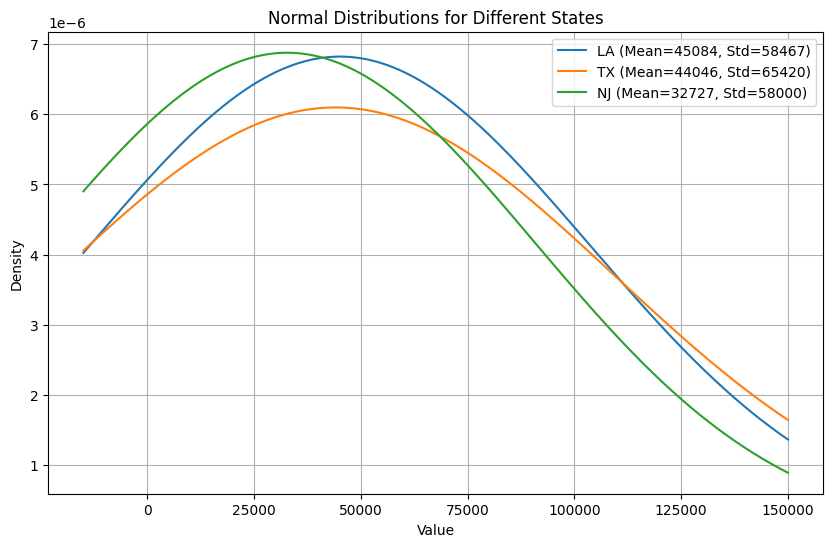

In [3]:
# Define parameters for each state
states = {
    "LA": {"max": 3763390, "mean": 45084, "std": 58467},
    "TX": {"max": 8973270, "mean": 44046, "std": 65420},
    "NJ": {"max": 4022518, "mean": 32727, "std": 58000},
}

# Define x values (range for the normal distribution)
x = np.linspace(-15000, 150000, 1000)

# Plot the normal distributions
plt.figure(figsize=(10, 6))
for state, params in states.items():
    y = norm.pdf(x, params["mean"], params["std"])
    plt.plot(x, y, label=f"{state} (Mean={params['mean']}, Std={params['std']})")

# Formatting the plot
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Normal Distributions for Different States")
plt.legend()
plt.grid(True)
plt.show()


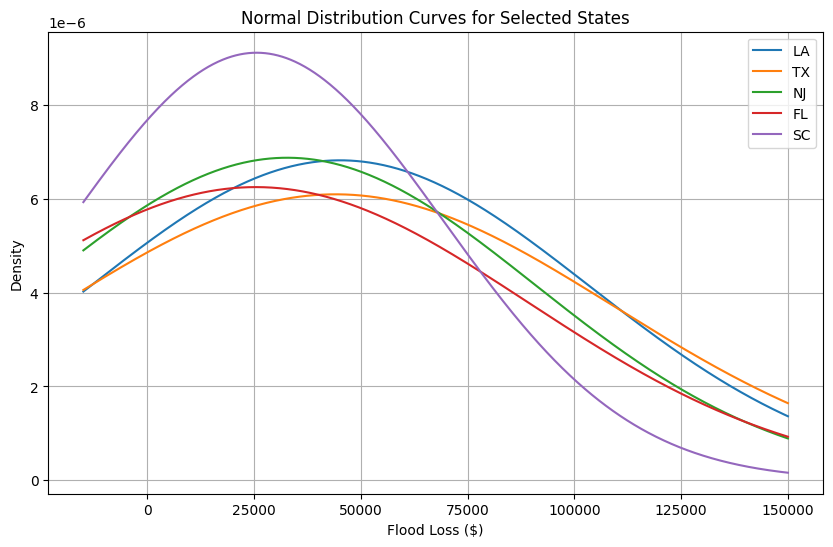

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the data
data = {
    "State": ["LA", "TX", "NJ", "NY", "FL", "MS", "NC", "PA", "AL", "SC"],
    "Max": [3763390, 8973270, 4022518, 9467720, 9100033, 10000000, 1294678, 1889793, 4900000, 1764000],
    "Mean": [45084, 44046, 32727, 35725, 25351, 46603, 21725, 19040, 28059, 25574],
    "Std": [58467, 65420, 58000, 74510, 63809, 94924, 41345, 41943, 95474, 43752],
    "Median": [20583, 19801, 13042, 13306, 8052, 14823, 7992, 6939, 8466, 10088]
}

# Create DataFrame
df = pd.DataFrame(data)

# Select states to highlight
selected_states = ["LA", "TX", "NJ",  "FL","SC"]

# Define x values for smooth curves
x = np.linspace(-15000, 150000, 1000)

# Create figure
plt.figure(figsize=(10, 6))

# Plot normal distribution curves for selected states
for _, row in df[df["State"].isin(selected_states)].iterrows():
    mean, std = row["Mean"], row["Std"]
    y = np.exp(-((x - mean) ** 2) / (2 * std ** 2)) / (std * np.sqrt(2 * np.pi))  # Normal PDF
    plt.plot(x, y, label=row["State"])

# Formatting plot
plt.xlabel("Flood Loss ($)")
plt.ylabel("Density")
plt.title("Normal Distribution Curves for Selected States")
plt.legend()
plt.grid(True)

# Show plot
# plt.show()
plt.savefig("../figs/clt_illustration.png")